In [2]:
import pandas as pd
demo = pd.read_csv("demo_clean.csv") 

In [3]:
demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,12.0,1.0,60.0,unknown,2,45105.30,6,9
1,2304905,14.0,10.0,58.0,unknown,2,110860.30,6,9
2,1439522,10.0,4.0,32.0,unknown,2,52467.79,6,9
3,1562045,32.0,6.0,49.0,male,2,67454.65,3,6
4,5126305,24.0,1.0,33.0,female,2,103671.75,0,3


In [4]:
demo = demo.dropna(subset=['bal'])
demo.isnull().sum()
print(demo.shape)

(70595, 9)


In [7]:
print(f"rows: {demo.shape[0]:,}  |  Columns: {demo.shape[1]}")
demo.info()         
demo.describe()

rows: 70,595  |  Columns: 9
<class 'pandas.core.frame.DataFrame'>
Index: 70595 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70595 non-null  int64  
 1   clnt_tenure_yr    70577 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70344 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  int64  
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  int64  
 8   logons_6_mnth     70595 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 5.4+ MB


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.059500e+04,70577.000000,70595.000000,70344.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.005021e+06,24.085212,6.016148,46.554632,2.255528,1.474452e+05,3.382478,5.566740
std,2.877269e+06,13.680023,3.814440,15.515624,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,4.000000,0.000000,18.000000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519604e+06,12.000000,2.000000,32.000000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016969e+06,22.000000,6.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483064e+06,32.000000,10.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,100.000000,11.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [9]:
#Create online usage bands
demo['online_usage'] = pd.cut(
    demo['logons_6_mnth'],
    bins=[-0.1, 0, 5, float('inf')],
    labels=['none', 'moderate', 'high']
)

demo['online_usage'].value_counts(dropna=False)

online_usage
moderate    35664
high        34931
none            0
Name: count, dtype: int64

In [11]:
#Resume from bands

summary = (
    demo.groupby('online_usage')
        .agg(
            avg_age=('clnt_age', 'mean'),
            median_age=('clnt_age', 'median'),
            avg_tenure_yr=('clnt_tenure_yr', 'mean'),
            median_tenure_yr=('clnt_tenure_yr', 'median'),
            n_clients=('client_id', 'count')
        )
        .round(2)
)

summary

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\736839701.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo.groupby('online_usage')


,avg_age,median_age,avg_tenure_yr,median_tenure_yr,n_clients
online_usage,,,,,
none,NaN,NaN,NaN,NaN,0
moderate,45.52,46.0,23.41,22.0,35664
high,47.61,49.0,24.77,22.0,34931


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\1738441141.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo.groupby('age_group')['online_usage']


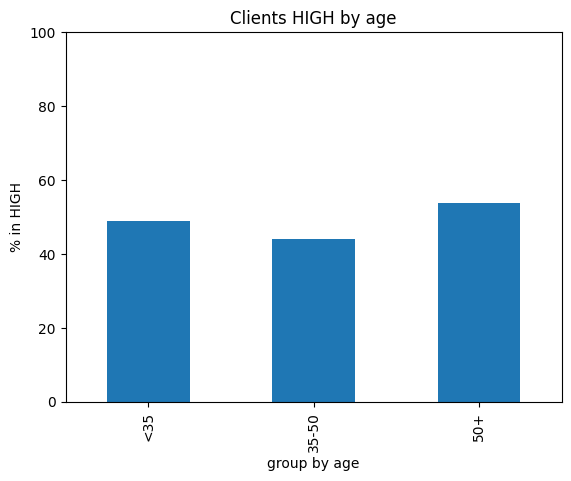

In [16]:
#Graficts group by age
import matplotlib.pyplot as plt
demo['age_group'] = pd.cut(demo['clnt_age'],
                           bins=[0, 34, 50, 100],
                           labels=['<35', '35-50', '50+'])

age_usage = (
    demo.groupby('age_group')['online_usage']
        .apply(lambda x: (x == 'high').mean() * 100)
        .sort_index()
)

age_usage.plot(kind='bar')
plt.title('Clients HIGH by age')
plt.ylabel('% in HIGH')
plt.xlabel('group by age')
plt.ylim(0, 100)
plt.show()

In [ ]:
# Who are the primary clients using this online process? +50 years

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\371378374.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo.groupby('tenure_group')['online_usage']


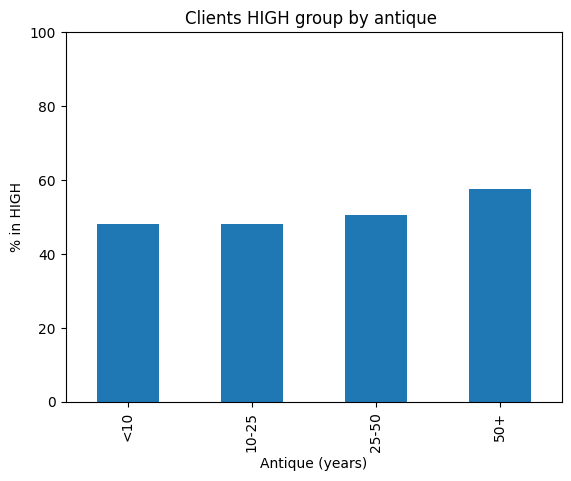

In [15]:
demo['tenure_group'] = pd.cut(demo['clnt_tenure_yr'],
                              bins=[0, 10, 25, 50, 100],
                              labels=['<10', '10-25', '25-50', '50+'])

tenure_usage = (
    demo.groupby('tenure_group')['online_usage']
        .apply(lambda x: (x == 'high').mean() * 100)
        .sort_index()
)

tenure_usage.plot(kind='bar')
plt.title('Clients HIGH group by antique ')
plt.ylabel('% in HIGH')
plt.xlabel('Antique (years)')
plt.ylim(0, 100)
plt.show()

In [ ]:
#Are the primary clients younger or older, new or long-standing? 1. olders. 2. long-standing